<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Support Vector Machines (SVM) - Régression

L'essai d'affaissement au cône d'Abrams mesure la consistance du béton frais avant sa prise. Il est effectué pour vérifier la maniabilité du béton frais, et donc la facilité avec laquelle le béton s'écoule. Il peut également servir d'indicateur d'un mélange inadéquat.

<img src="https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/Types_of_concrete_slump.jpg">

Notre ensemble de données se compose de divers composants (ou propriétés) du béton et des mesures de l'essai ou test d'affaissement qui en résultent en cm. Plus tard, la résistance à la compression du béton est testée 28 jours plus tard.

Variables d'entrée (7) (composant en kg dans un M^3 de béton) :
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Variables de sortie (3) :
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Source des données : https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit : Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('cement_slump.csv')

In [ ]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [ ]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

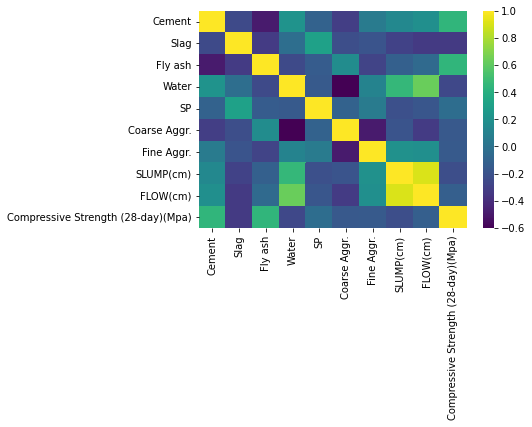

In [ ]:
sns.heatmap(df.corr(),cmap='viridis');

In [ ]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

## Fractionnement Entraînement | Test

Vous pouvez également configurer ce système comme un pipeline, quelque chose comme :

    >>> from sklearn.pipeline import make_pipeline
    >>> from sklearn.preprocessing import StandardScaler
    >>> from sklearn.svm import SVR

    >>> clf = make_pipeline(StandardScaler(), SVR())

In [ ]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [ ]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Support Vector Machines - Régression

Il existe trois implémentations différentes de la régression par vecteur de support : SVR, NuSVR et LinearSVR. LinearSVR fournit une implémentation plus rapide que SVR mais ne considère que le noyau linéaire, tandis que NuSVR implémente une formulation légèrement différente de SVR et LinearSVR. Voir les [détails de l'implémentation](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) pour plus d'informations.

In [ ]:
from sklearn.svm import SVR,LinearSVR

Réglage de C : C est 1 par défaut et c'est un choix par défaut raisonnable. Si vous avez beaucoup d'observations bruyantes, vous devriez le diminuer : la diminution de C correspond à une plus grande régularisation.

LinearSVC et LinearSVR sont moins sensibles à C quand il devient grand, et les résultats de prédiction cessent de s'améliorer après un certain seuil. En même temps, des valeurs de C plus grandes prennent plus de temps pour l'entraînement, parfois jusqu'à 10 fois plus longtemps.

Epsilon : https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

In [ ]:
base_model = SVR()

In [ ]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [ ]:
base_preds = base_model.predict(scaled_X_test)

## Évaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(y_test,base_preds)

5.236902091259178

In [ ]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [ ]:
y_test.mean()

36.26870967741935

## Grid Search pour tenter de trouver un meilleur modèle

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [ ]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
mean_absolute_error(y_test,grid_preds)

2.5128012210762365

In [ ]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.178210305119858

On a grandement amélioré notre modèle !